**From Chat GPT output**  
The objective of the Python code was to demonstrate how fuzzy logic can be used to control a car's speed based on the distance to an obstacle. It implemented fuzzy variables, membership functions, and rules to compute the appropriate speed using a given distance. The code showcased the process and provided a visual representation of the fuzzy logic system.

In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
# Define the fuzzy variables and membership functions
distance = ctrl.Antecedent(np.arange(0,11,1),'distance')
speed = ctrl.Consequent(np.arange(0,101,1),'speed')

In [3]:
distance

Antecedent: distance

In [5]:
speed

Consequent: speed

In [11]:
# Define the membership functions for the distance variable
distance['close'] = fuzz.trimf(distance.universe,[0,0,5])
distance['medium'] = fuzz.trimf(distance.universe, [0, 5, 10])
distance['far'] = fuzz.trimf(distance.universe, [5, 10, 10])

In [12]:
# Define the membership functions for the speed variable
speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['medium'] = fuzz.trimf(speed.universe, [0, 50, 100])
speed['fast'] = fuzz.trimf(speed.universe, [50, 100, 100])

In [13]:
# Define the fuzzy rules
rule1 = ctrl.Rule(distance['close'],speed['slow'])
rule2 = ctrl.Rule(distance['medium'], speed['medium'])
rule3 = ctrl.Rule(distance['far'], speed['fast'])

In [14]:
# Create the fuzzy control system
speed_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
speed_ctrl_simulation = ctrl.ControlSystemSimulation(speed_ctrl)

In [15]:
# Input a crisp distance value and compute the speed
distance_value = 3.5
speed_ctrl_simulation.input['distance'] = distance_value
speed_ctrl_simulation.compute()

In [16]:
# Print the computed speed
computed_speed = speed_ctrl_simulation.output['speed']
print(f"Computed Speed: {computed_speed}")


Computed Speed: 47.8795811518325


c:\users\marwane\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\marwane\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


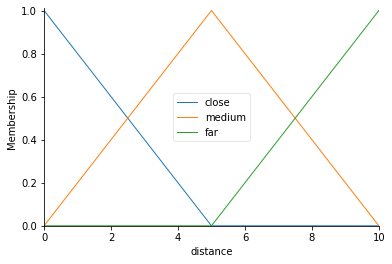

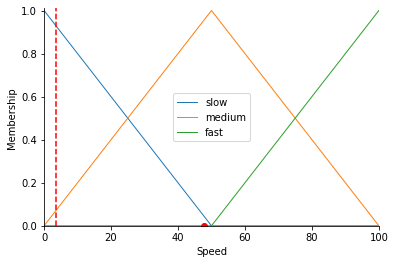

In [19]:
# Plot the membership functions and the output
distance.view()
speed.view()
plt.axvline(x=distance_value, color='r', linestyle='--')
plt.plot(computed_speed, 0, 'ro')
plt.xlabel('Speed')
plt.ylabel('Membership')
plt.legend()
plt.show()